# **Classifying Spam**

**Abstract:** This dataset is a collection of the count of different words and characters in emails. Each row in the dataset is an email. And each column is a normalized count of the frequency of different words in the email. The classification goal is to predict if an email is spam(variable class).

**Dataset Information:** This collection of spam e-mails came from the postmaster and individuals who had filed spam.  The collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam.  These are useful when constructing a personalized spam filter.

**Attribute Information:**

**Word Frequency data:**

* Word frequency count(numeric): word_freq_make, word_freq_address, word_freq_all, word_freq_3d, word_freq_our, word_freq_over, word_freq_remove, word_freq_internet, word_freq_order, word_freq_mail, word_freq_receive, word_freq_will, word_freq_people, word_freq_report, word_freq_addresses, word_freq_free, word_freq_business, word_freq_email, word_freq_you, word_freq_credit, word_freq_your, word_freq_font, word_freq_000, word_freq_money, word_freq_hp, word_freq_hpl, word_freq_george, word_freq_650, word_freq_lab, word_freq_labs, word_freq_telnet, word_freq_857, word_freq_data, word_freq_415, word_freq_85, word_freq_technology, word_freq_1999, word_freq_parts, word_freq_pm, word_freq_direct, word_freq_cs, word_freq_meeting, word_freq_original, word_freq_project, word_freq_re, word_freq_edu, word_freq_table, word_freq_conference

**Character Frequency data:**


*   Character frequency count(numeric): char_freq_; char_freq_(, char_freq_[, char_freq_!, char_freq_$, char_freq_#

**Capital run length data:**


*   Capital run length(numeric): capital_run_length_average, capital_run_length_longest, capital_run_length_total



**Output Variable(desired target):**

*   Class - is this email spam?(binary: '0' for non spam, '1' for spam)




**Source:** https://archive.ics.uci.edu/dataset/94/spambase


**Project By:**

*   Anuthama Raghu Bharathwaj












### Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.linear_model import LogisticRegression

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Reading the data set

In [ ]:
#reading the dataset
import pandas as pd
import requests
from io import StringIO

# orig_url="https://drive.google.com/file/d/1BbkPafbFm_JjCk-Y4KWVgOkc_T5pRWwg/view?usp=sharing"
# file_id = orig_url.split('/')[-2]
# dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
# url = requests.get(dwn_url).text

# csv_raw = StringIO(url)
# spam = pd.read_csv(csv_raw, sep=';') # the sep argument indicates how the data values are separated

from google.colab import drive
drive.mount('/content/drive')
spam=pd.read_csv('drive/MyDrive/spambase.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Examine the first few lines of the data set

In [ ]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### 3. Examine the data information

In [ ]:
# take a look at the type, number of columns, entries, null values etc..
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

### 4. Check for missing values

In [ ]:
spam.isnull().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

### 5. Separate the feature variables from the target variable.

In [ ]:
#Separating target variable and other variables
y= spam['Class']
X= spam.drop(columns = ['Class'])

### 6. Split the data into training and testing sets.

In [ ]:
#splitting the data into 70% train and 30% test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

### 6. Exploring Quantitative Data

In [ ]:
#Generating a statisticl summary of the quantitative data
summary = spam.describe()
print(summary)

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

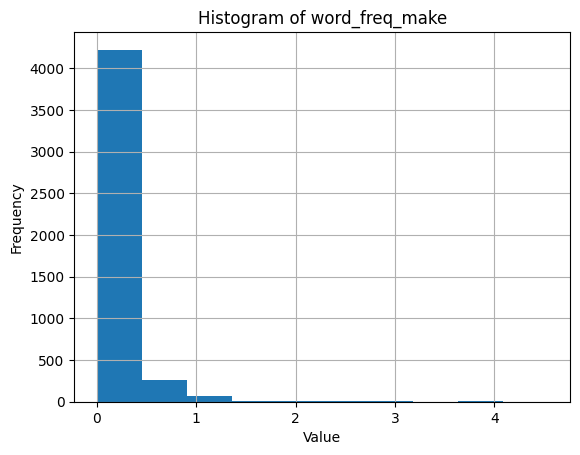

In [ ]:
# Creating a histogram for a specific quantitative variable(example - word_freq_make)

spam['word_freq_make'].hist()
plt.title('Histogram of word_freq_make')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


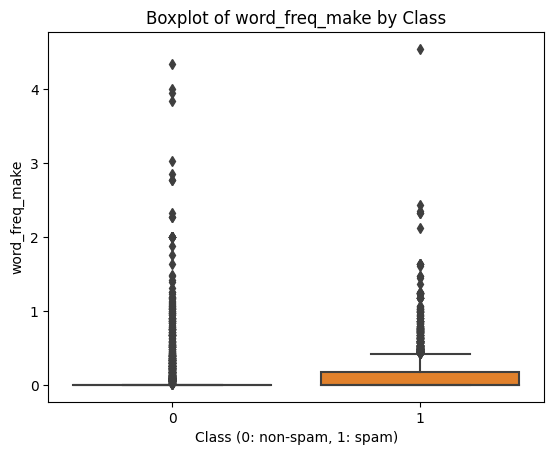

In [ ]:
import seaborn as sns

# Creating a boxplot for a quantitative variable(example - word_freq_make)
sns.boxplot(x='Class', y='word_freq_make', data=spam)
plt.title('Boxplot of word_freq_make by Class')
plt.xlabel('Class (0: non-spam, 1: spam)')
plt.ylabel('word_freq_make')
plt.show()


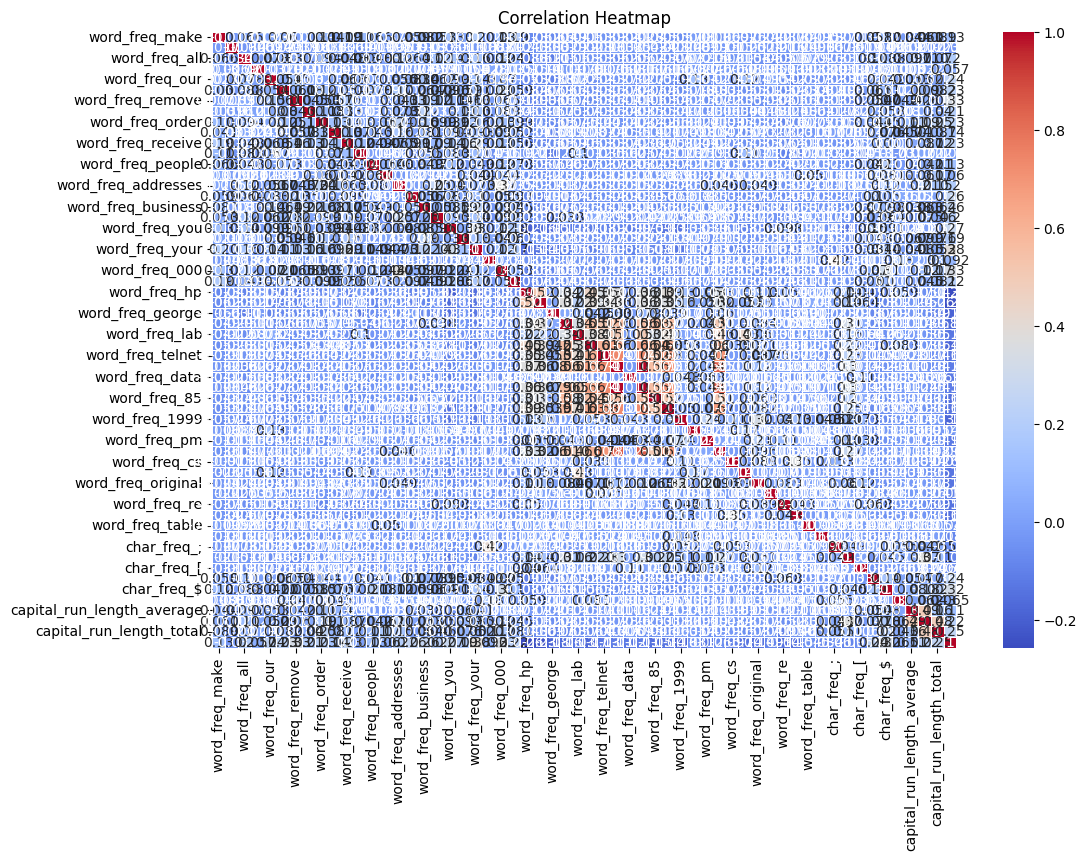

In [ ]:
# Calculaing the correlation matrix
correlation_matrix = spam.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


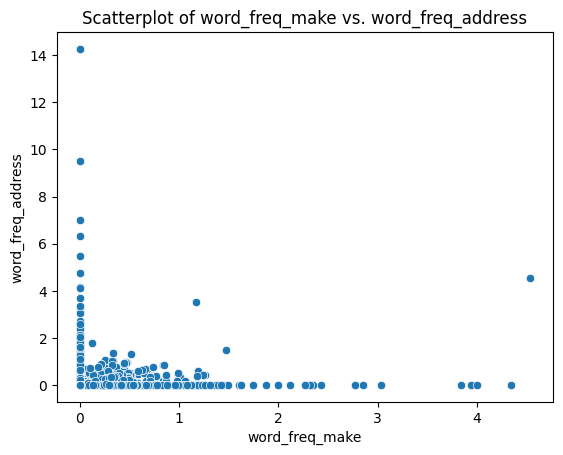

In [ ]:
# Creating a scatterplot for two highly correlated variables
sns.scatterplot(x='word_freq_make', y='word_freq_address', data=spam)
plt.title('Scatterplot of word_freq_make vs. word_freq_address')
plt.xlabel('word_freq_make')
plt.ylabel('word_freq_address')
plt.show()
